## Step-1: Load and preprocess data

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# data load
data=pd.read_csv("../dataset/mnist/mnist_train.csv")

In [7]:
data.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data=np.array(data)
#data=np.asfarray(data) # converting the datatype from int to float
m,n=data.shape
np.random.shuffle(data) 

In [9]:
print(m,n)

60000 785


So, the train dataset contains 60000 examples. where each row represents a training example. Now we will split the dataset into train , validation set. Moreover, for convenience we will transpose the dataset so that each column represents a trainign example


In [10]:
#validation set
data_val=data[:1000].T
X_val=data_val[1:n] #discarding 0 column which contains labels
X_val=np.asfarray(X_val)
X_val/=255.0 # normalize data to train faster
Y_val=data_val[0]

#training set
data_train=data[1000:m].T
X_train=data_train[1:n]
X_train=np.asfarray(X_train)
Y_train=data_train[0]
X_train/=255



In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_train[:,:2]) #frist 2 training example
print(Y_train[:2]) #first 2 labels

(784, 59000)
(59000,)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[9 5]


we have our different dataset. we can now perform out training part. But for this we need to initialize our weights and biases.

In [12]:
def init_params():
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, 1) - 0.5
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    # W3 = np.random.rand(10, 16) - 0.5
    # b3 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

we use ReLU for activation in layers except output layer and softmax functions in the output layer.

In [13]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [14]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [15]:
def ReLU_deriv(Z):
    return Z > 0

### Forward propagation
We are ready for forward pass

In [16]:
def forward_prop (W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X)+ b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    # Z3 = np.dot(W3,A2) + b3
    # A3 = softmax(Z3)
    return Z1, A1, Z2, A2

In [17]:
print(Y_train[:10])

[9 5 1 1 5 8 6 2 9 1]


Notice here that the y contains the index of true labels for each examples. For conveniece we can use One-hot-encoding. In this process we will put 1 at the true label positions and 0 at other positons.

In [18]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  #each column represents labels, row one example
    one_hot_Y[np.arange(Y.size), Y] = 1.0 #sets 1 at the actural label position
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [19]:
print(one_hot(Y_train).shape)

(10, 59000)


In [20]:
print(one_hot(Y_train))


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [21]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [22]:
def update_params(W1, b1, W2, b2,dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    

    # W3 = W3 - alpha * dW3
    # b3 = b3 - alpha * db3 
    return W1, b1, W2, b2

In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [24]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    acc=np.sum(predictions == Y) / Y.size
    return acc*100

In [25]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2= init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2= forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2= backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [26]:
W1, b1, W2, b2= gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 2 9 ... 9 9 9] [9 5 1 ... 6 0 8]
9.742372881355932
Iteration:  10
[5 2 6 ... 5 6 4] [9 5 1 ... 6 0 8]
17.05593220338983
Iteration:  20
[4 4 6 ... 5 6 4] [9 5 1 ... 6 0 8]
23.572881355932203
Iteration:  30
[4 4 6 ... 5 6 4] [9 5 1 ... 6 0 8]
30.230508474576272
Iteration:  40
[4 4 6 ... 5 6 4] [9 5 1 ... 6 0 8]
37.33050847457628
Iteration:  50
[5 4 6 ... 5 6 4] [9 5 1 ... 6 0 8]
43.003389830508475
Iteration:  60
[5 4 6 ... 5 0 4] [9 5 1 ... 6 0 8]
47.588135593220336
Iteration:  70
[5 4 6 ... 6 0 4] [9 5 1 ... 6 0 8]
52.42203389830509
Iteration:  80
[5 3 6 ... 6 0 4] [9 5 1 ... 6 0 8]
60.67796610169491
Iteration:  90
[9 3 1 ... 6 0 3] [9 5 1 ... 6 0 8]
65.06101694915255
Iteration:  100
[9 3 1 ... 6 0 3] [9 5 1 ... 6 0 8]
67.4728813559322
Iteration:  110
[9 3 1 ... 6 0 3] [9 5 1 ... 6 0 8]
69.4593220338983
Iteration:  120
[9 3 1 ... 6 0 3] [9 5 1 ... 6 0 8]
71.07796610169491
Iteration:  130
[9 3 1 ... 6 0 3] [9 5 1 ... 6 0 8]
72.50508474576272
Iteration:  140
[9 3 1 ... 6 

In [27]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [28]:
def test_prediction(index, W1, b1, W2, b2,):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

let's look at couple of examples


Prediction:  [9]
Label:  9


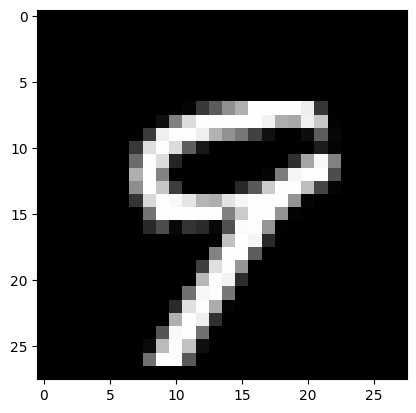

Prediction:  [5]
Label:  5


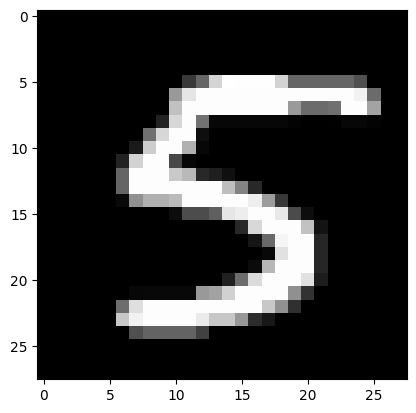

Prediction:  [1]
Label:  1


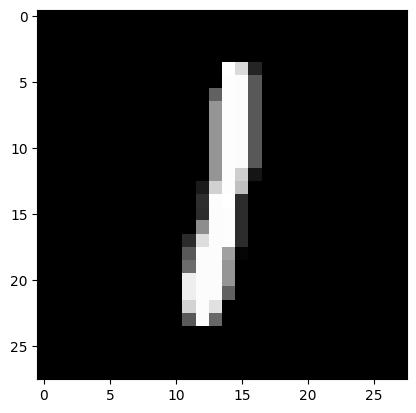

Prediction:  [1]
Label:  1


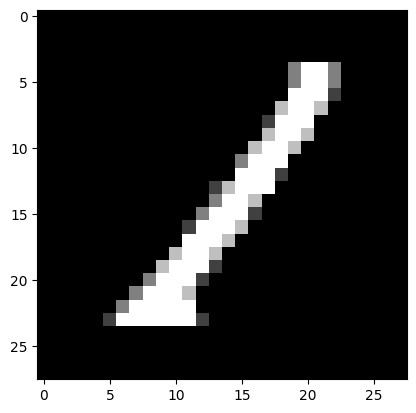

Prediction:  [2]
Label:  5


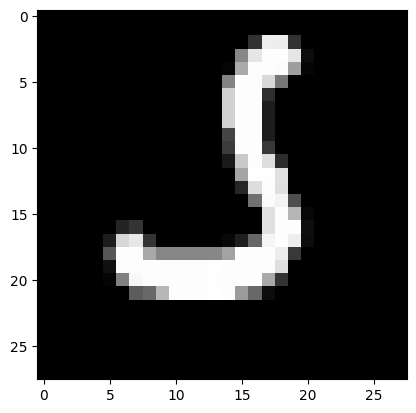

Prediction:  [8]
Label:  8


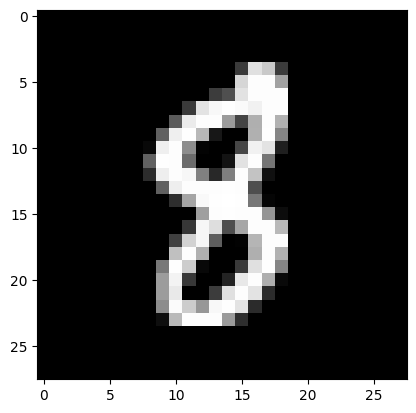

Prediction:  [6]
Label:  6


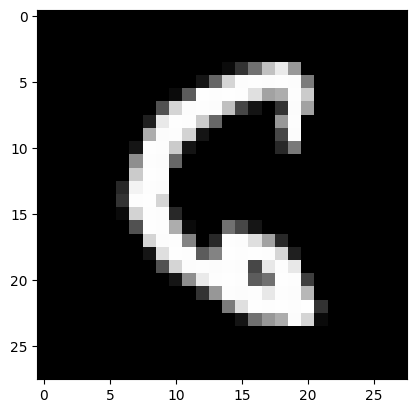

Prediction:  [2]
Label:  2


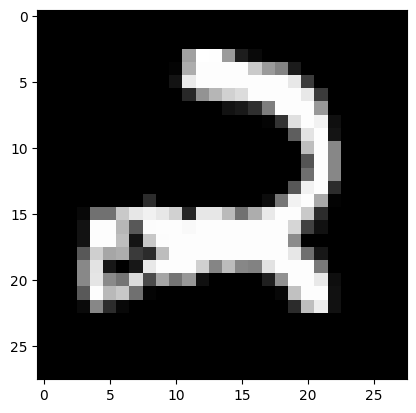

Prediction:  [9]
Label:  9


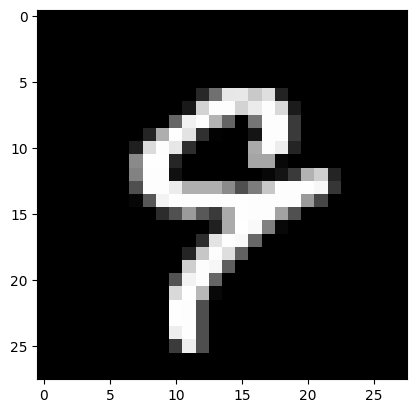

Prediction:  [1]
Label:  1


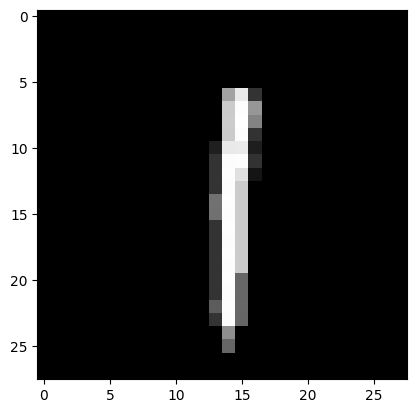

In [29]:
for i in range (10):
    test_prediction(i, W1, b1, W2, b2)

# test_prediction(0, W1, b1, W2, b2,W3,b3)
# test_prediction(1, W1, b1, W2, b2,W3,b3)
# test_prediction(2, W1, b1, W2, b2,W3,b3)
# test_prediction(3, W1, b1, W2, b2,W3,b3)

let's find the accuracy on validation set

In [30]:
val_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(val_predictions, Y_val)

[1 7 0 0 7 8 3 2 2 1 9 0 8 7 2 8 1 0 6 1 2 9 5 5 0 7 7 8 8 7 1 0 8 0 8 8 3
 6 3 5 3 6 5 3 4 8 4 0 1 2 0 1 0 8 0 6 1 7 9 0 5 8 6 1 9 4 8 3 2 0 6 0 8 6
 6 5 7 6 7 1 5 0 3 5 4 9 1 5 4 5 6 7 8 9 1 6 0 9 9 0 2 8 9 2 1 3 7 5 8 9 4
 5 0 8 6 4 0 7 7 8 1 4 8 2 2 7 4 4 9 5 1 4 0 8 7 6 9 7 0 3 3 0 9 6 6 0 9 3
 3 1 6 3 0 1 7 9 1 5 4 4 2 1 4 1 3 7 2 4 4 2 7 3 3 2 5 9 9 1 3 4 7 0 2 1 8
 4 0 9 7 3 2 7 6 0 1 4 6 1 5 9 1 3 7 8 3 5 8 5 9 7 7 2 0 1 3 7 5 6 3 9 6 1
 3 1 8 6 8 5 7 7 9 7 8 1 2 2 2 4 8 4 4 1 4 1 6 7 1 8 5 0 2 5 0 7 0 0 1 6 8
 3 6 9 9 1 2 1 4 0 8 9 8 8 5 9 1 0 3 2 1 7 9 9 7 0 9 9 3 4 4 5 7 7 7 2 8 5
 3 2 0 4 8 6 0 1 1 9 0 3 6 7 0 9 2 3 7 2 6 4 7 7 5 3 8 1 7 0 7 3 7 1 9 3 9
 3 5 4 6 0 5 1 6 0 3 6 0 7 1 0 9 3 3 7 7 3 7 7 5 8 2 5 9 1 2 0 8 9 7 6 3 4
 6 4 7 8 7 9 2 6 2 3 6 3 2 1 3 0 5 6 4 5 2 3 7 3 6 7 1 0 0 3 0 7 0 7 6 9 2
 2 2 0 1 4 8 1 7 5 1 2 5 0 8 9 5 2 6 1 1 1 0 5 2 9 3 3 6 9 1 8 0 8 7 5 7 6
 4 2 6 0 3 1 4 4 6 8 9 5 9 4 3 1 2 9 7 4 8 2 3 7 0 7 8 4 4 6 6 3 6 5 1 8 3
 7 4 9 8 0 4 0 5 7 0 8 1 

86.4